In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

In [4]:
data = pd.read_csv('Fish.csv')

In [5]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
print(data['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
x =data[['Species','Length1','Length2','Length3','Height','Width']].values

In [7]:
y = data[['Weight']].values

In [8]:
st = ColumnTransformer([('Species',OneHotEncoder(),[0])],remainder='passthrough')

In [9]:
x = st.fit_transform(x)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
model = LinearRegression()

In [12]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_predict = model.predict(x_test)

In [14]:
y_predict

array([[ 871.44012771],
       [  69.93231756],
       [ 193.86366275],
       [ -98.68876112],
       [ 620.23799946],
       [ 380.71675467],
       [ 517.97127612],
       [ 479.21855819],
       [ 975.95803464],
       [ 149.92781491],
       [ 296.94383839],
       [ 736.6108312 ],
       [ 891.29142129],
       [ 567.87707165],
       [1012.23209915],
       [ 994.03036056],
       [ 534.52281519],
       [ 200.01279764],
       [ 252.10921488],
       [ 454.6689605 ],
       [ 294.81454879],
       [ 368.70377346],
       [ 147.15361886],
       [ 140.52599029],
       [ 172.21794114],
       [ 189.25258513],
       [ 306.70604938],
       [ -69.81505463],
       [  63.9174353 ],
       [ 354.38685382],
       [ -17.52909662],
       [ 141.81069133]])

In [17]:
print(y_predict.sum().mean())
print(y_test.sum().mean())

print("So called Accuracy ", y_predict.sum().mean()/y_test.sum().mean())

12193.022531592607
11522.6
So called Accuracy  1.0581832686713595


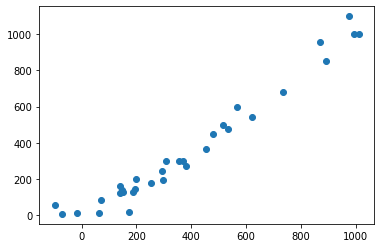

In [21]:
plt.scatter(y_predict,y_test)
plt.plot()
plt.show()